### Simulação do Cenário 1 - Opção 1

In [1]:
import random
from quantumnet.components import Network, Host, Controller
from quantumnet.components import ServerNode, ClientNode, RegularNode
from quantumnet.objects import Qubit, Logger

Hosts inicializados
Canais inicializados
Pares EPRs adicionados


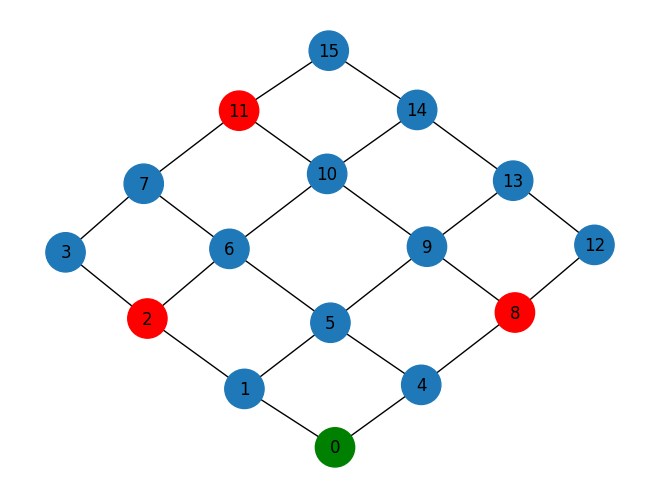

In [2]:
rede = Network()
controller = Controller(rede)

# Chamada corrigida para passar a topologia corretamente
rede.set_ready_topology('grade', 8, 4, 4, clients=[11,8,2], server=0)  # 8 clientes, 4x4 de topologia
rede.draw()
Logger.activate(Logger)

##### Nessa parte, eu posso gerar minha requesições, dos protocolos Childs(AC_BQC) e BFK_BQC.

##### O cenário 1 apresenta o agendamento das requesições de forma que pode-se executar protocolos em caminhos diferentes, porém no mesmo timeslot.

In [3]:
# clientes = [8,2]  

# for _ in range(5): # Escolha de quantas requesições serão feitas
#     alice_id = random.choice(clientes)
#     bob_id = 0
#     num_qubits = 10
#     num_gates = 20
#     scenario = 1

#     request = rede.generate_request(alice_id=alice_id, bob_id=bob_id, num_qubits=num_qubits, num_gates=num_gates, scenario=scenario)
#     controller.receive_request(request)


# controller.process_requests()
# controller.send_scheduled_requests()



##### Nesse parte, pode-se gerar requesições de somente um protocolo. 

In [4]:
# clientes = [8, 2] 

# for _ in range(10):
#     alice_id = random.choice(clientes)
#     bob_id = 0  
#     num_qubits = 5
#     num_gates = 20 
#     scenario = 1  

    
#     request = rede.generate_request(
#         alice_id=alice_id,
#         bob_id=bob_id,
#         num_qubits=num_qubits,
#         num_gates=num_gates,
#         scenario=scenario
#     )
    
#     request['protocol'] = "BFK_BQC"  # Define o protocolo a ser usado: "BFK_BQC" ou "AC_BQC"

#     # Envia a requisição para o controlador
#     controller.receive_request(request)

# # Processa e executa as requisições
# controller.process_requests()
# controller.send_scheduled_requests()


In [5]:
clientes = [8, 2] 

for _ in range(2):
    alice_id = random.choice(clientes)
    bob_id = 0  
    num_qubits = 10
    num_gates = 20 
    scenario = 1  

    
    request = rede.generate_request(
        alice_id=alice_id,
        bob_id=bob_id,
        num_qubits=num_qubits,
        num_gates=num_gates,
        scenario=scenario
    )
    
    request['protocol'] = "AC_BQC"  # Define o protocolo a ser usado: "BFK_BQC" ou "AC_BQC"

    # Envia a requisição para o controlador
    controller.receive_request(request)

# Processa e executa as requisições
controller.process_requests()
controller.send_scheduled_requests()


     ┌───┐┌───┐┌───┐                         
q_0: ┤ Z ├┤ S ├┤ S ├─────────────────────────
     └───┘└───┘└───┘     ┌───┐               
q_1: ─────────────────X──┤ T ├───────────────
                      │  └───┘               
q_2: ───────X────X────┼─────────X────────────
     ┌───┐  │    │    │         │            
q_3: ┤ X ├──┼────┼────X─────────┼────────────
     └───┘  │    │  ┌───┐┌───┐  │  ┌───┐┌───┐
q_4: ───────┼────X──┤ S ├┤ T ├──┼──┤ X ├┤ X ├
            │       ├───┤└───┘  │  └───┘└───┘
q_5: ───────X────X──┤ X ├───────┼────────────
                 │  └───┘┌───┐  │            
q_6: ────────────┼────X──┤ X ├──X────■───────
                 │    │  └───┘       │       
q_7: ────────────┼────┼──────────────┼───────
                 │    │              │       
q_8: ────────────┼────┼──────────────┼───────
                 │    │  ┌───┐┌───┐  │       
q_9: ────────────X────X──┤ H ├┤ H ├──■───────
                         └───┘└───┘          


2025-01-03 19:07:37,018: Circuito aleatório gerado com 10 qubits e 20 portas. Instruções sobre o circuito.
2025-01-03 19:07:37,019: Instrução: {'operation': 'x', 'qubits': [3]}
2025-01-03 19:07:37,020: Instrução: {'operation': 'z', 'qubits': [0]}
2025-01-03 19:07:37,021: Instrução: {'operation': 'swap', 'qubits': [2, 5]}
2025-01-03 19:07:37,021: Instrução: {'operation': 'swap', 'qubits': [2, 4]}
2025-01-03 19:07:37,023: Instrução: {'operation': 's', 'qubits': [4]}
2025-01-03 19:07:37,023: Instrução: {'operation': 's', 'qubits': [0]}
2025-01-03 19:07:37,024: Instrução: {'operation': 'swap', 'qubits': [9, 5]}
2025-01-03 19:07:37,024: Instrução: {'operation': 'x', 'qubits': [5]}
2025-01-03 19:07:37,025: Instrução: {'operation': 'swap', 'qubits': [1, 3]}
2025-01-03 19:07:37,025: Instrução: {'operation': 't', 'qubits': [4]}
2025-01-03 19:07:37,026: Instrução: {'operation': 't', 'qubits': [1]}
2025-01-03 19:07:37,027: Instrução: {'operation': 'swap', 'qubits': [6, 9]}
2025-01-03 19:07:37,028

     ┌───┐                                           
q_0: ┤ X ├─────────────────────■─────────────────────
     └─┬─┘                     │                     
q_1: ──┼──────────────X────────┼───X─────────────────
       │  ┌───┐       │        │   │                 
q_2: ──■──┤ H ├───────┼────■───┼───┼─────────────────
          ├───┤┌───┐  │    │   │   │                 
q_3: ─────┤ Z ├┤ Y ├──┼────┼───┼───┼─────────────────
          └───┘└───┘  │  ┌─┴─┐ │   │                 
q_4: ───────■─────────┼──┤ X ├─┼───X─────────────────
     ┌───┐  │         │  ├───┤ │                     
q_5: ┤ X ├──┼────X────┼──┤ Z ├─┼────────■────────────
     └───┘┌─┴─┐  │    │  ├───┤ │        │            
q_6: ─────┤ X ├──┼────┼──┤ Y ├─┼────────┼────────────
          └───┘  │    │  └───┘ │ ┌───┐  │  ┌───┐     
q_7: ────────────┼────┼────────┼─┤ X ├──┼──┤ S ├─────
          ┌───┐  │    │        │ └─┬─┘  │  ├───┤┌───┐
q_8: ─────┤ Y ├──┼────X────────■───■────┼──┤ T ├┤ Z ├
          └───┘  │  ┌───┐   

2025-01-03 19:07:37,252: Circuito aleatório gerado com 10 qubits e 20 portas. Instruções sobre o circuito.
2025-01-03 19:07:37,254: Instrução: {'operation': 'x', 'qubits': [5]}
2025-01-03 19:07:37,255: Instrução: {'operation': 'cx', 'qubits': [2, 0]}
2025-01-03 19:07:37,256: Instrução: {'operation': 'cx', 'qubits': [4, 6]}
2025-01-03 19:07:37,258: Instrução: {'operation': 'y', 'qubits': [8]}
2025-01-03 19:07:37,259: Instrução: {'operation': 'swap', 'qubits': [9, 5]}
2025-01-03 19:07:37,260: Instrução: {'operation': 'swap', 'qubits': [8, 1]}
2025-01-03 19:07:37,263: Instrução: {'operation': 'h', 'qubits': [9]}
2025-01-03 19:07:37,265: Instrução: {'operation': 'z', 'qubits': [5]}
2025-01-03 19:07:37,286: Instrução: {'operation': 'z', 'qubits': [3]}
2025-01-03 19:07:37,289: Instrução: {'operation': 'cz', 'qubits': [0, 8]}
2025-01-03 19:07:37,291: Instrução: {'operation': 'y', 'qubits': [3]}
2025-01-03 19:07:37,294: Instrução: {'operation': 'cx', 'qubits': [8, 7]}
2025-01-03 19:07:37,295: 

Tempo de Operação: 6
Pares EPRs adicionados
Hosts inicializados
Tempo de Operação: 6
Pares EPRs adicionados
Hosts inicializados


##### Mostra o relatório de execução das requesições.

In [6]:
controller.generate_schedule_report()

=== Relatório de Requisições ===

Requisições que falharam:
- Alice ID: 8, Bob ID: 0, Nº de Qubits: 10, Rota: None, Motivo: Falha desconhecida
- Alice ID: 8, Bob ID: 0, Nº de Qubits: 10, Rota: None, Motivo: Falha desconhecida

=== Fim do Relatório ===


{'success': 0,
 'failed': 2,
 'scheduled': 0,
 'failed_details': [{'alice_id': 8,
   'bob_id': 0,
   'num_qubits': 10,
   'route': None,
   'reason': 'Falha desconhecida'},
  {'alice_id': 8,
   'bob_id': 0,
   'num_qubits': 10,
   'route': None,
   'reason': 'Falha desconhecida'}]}

##### Contabiliza quantos EPRs foram usados.

In [7]:
rede.get_total_useds_eprs()

2025-01-03 19:07:37,976: Eprs usados na camada LinkLayer: 0
2025-01-03 19:07:37,978: Eprs usados na camada NetworkLayer: 0
2025-01-03 19:07:37,979: Eprs usados na camada ApplicationLayer: 48


48

##### Mostra a fidelidade das rotas utilizadas.

In [8]:
rede.application_layer.avg_fidelity_on_applicationlayer()

A média das fidelidades das rotas é: 0.9468


0.9467873618126756

In [9]:
rede.application_layer.print_route_fidelities()

Fidelidades das rotas utilizadas:
1.0000
0.9900
0.9801
0.9704
0.9607
0.9511
0.9416
0.9322
0.9229
0.9137
0.8518
1.0000
0.9900
0.9801
0.9704
0.9607
0.9511
0.9416
0.9322
0.9229
0.9137
0.8518
